/Users/leonardocipriani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


┌───┐»
q_0: ─────────────────────────────■─────────────────■─────────────■───────┤ H ├»
                                  │                 │       ┌───┐ │P(π/2) └───┘»
q_1: ───────────────■─────────────┼────────■────────┼───────┤ H ├─■─────────X──»
                    │       ┌───┐ │        │P(π/2)  │P(π/4) └───┘           │  »
q_2: ──────■────────┼───────┤ H ├─┼────────■────────■───────────────────────X──»
     ┌───┐ │P(π/2)  │P(π/4) └───┘ │P(π/8)                                      »
q_3: ┤ H ├─■────────■─────────────■────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

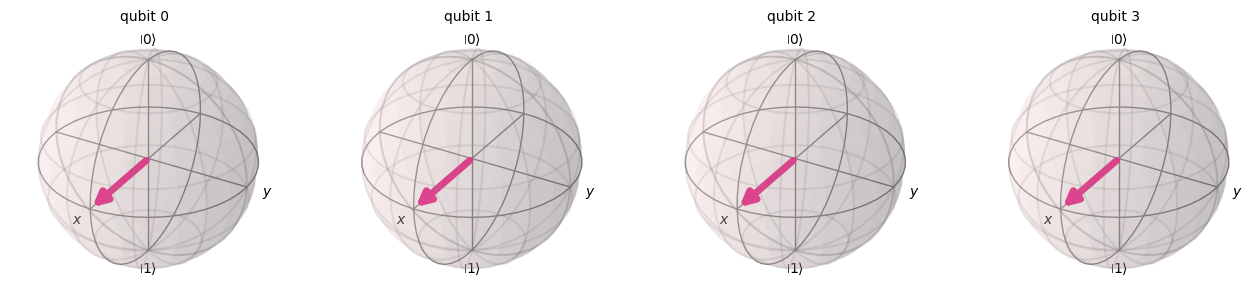

In [1]:
# Ferramentas matemáticas
import numpy as np
from numpy import pi

# Ferramentas para manipulação dos circuitos
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### 4-qubit QFT ###
# Cria o circuito quântico
qc = QuantumCircuit(4)

# Hadamard e rotações controladas para o qubit mais significativo 
qc.h(3)
qc.cp(pi/2, 2, 3)
qc.cp(pi/4, 1, 3)
qc.cp(pi/8, 0, 3)

# Hadamard e rotações controladas para segundo qubit mais significativo 
qc.h(2)
qc.cp(pi/2, 1, 2)
qc.cp(pi/4, 0, 2)

# Hadamard e rotações controladas para o terceiro qubit mais significativo 
qc.h(1)
qc.cp(pi/2, 0, 1)

# Hadamard e rotações controladas para o qubit menos significativo 
qc.h(0)

# Troca os estados dos qubits 
# (pra bater com a definição matemática, pois o Qiskit é little-endian)
qc.swap(0,3)
qc.swap(1,2)

# Desenha o circuito
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
display(plot_bloch_multivector(statevector))

┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     ├───┤
q_2: ┤ X ├
     └───┘

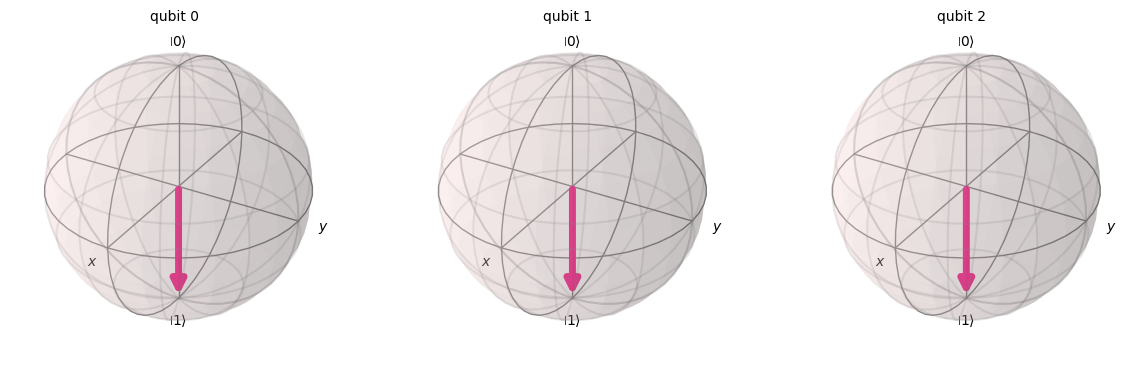

┌───┐                                     ┌───┐   
q_0: ┤ X ├──────■──────────────────────■───────┤ H ├─X─
     ├───┤      │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ X ├──────┼────────■───────┤ H ├─■─────────────┼─
     ├───┤┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
     └───┘└───┘

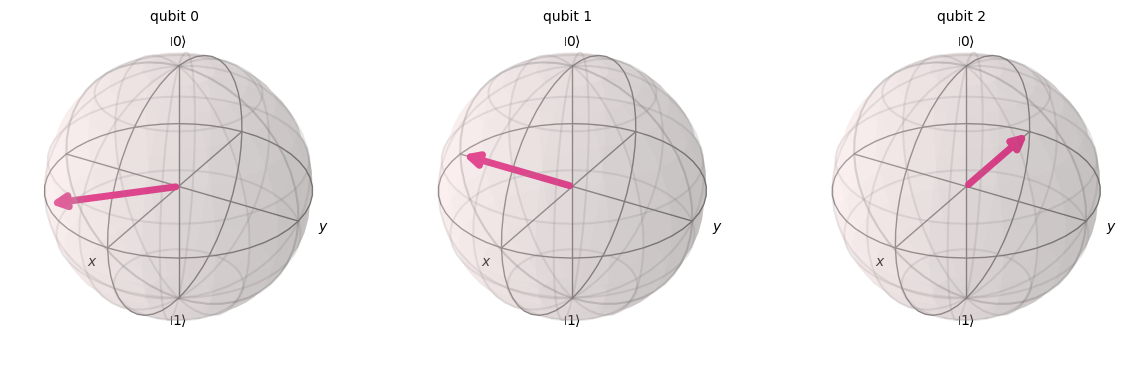

In [2]:
### n-qubit QFT ###
# Hadamard e rotações controladas
def qft_rotations(circuit, n):
    # Circuito vazio
    if n == 0:
        return circuit
    
    # Inicia no qubit mais significativo
    n -= 1
    
    # Aplica Hadamard
    circuit.h(n)
    
    # Aplica as rotações controladas pelos qubits de menor índice
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
        
    # Executa recursivamente para os demais qubits
    qft_rotations(circuit, n)

    
# Troca os estados dos qubits 
# (pra bater com a definição matemática, pois o Qiskit é little-endian)
def swap_qubits(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit


# Cria o circuito QFT para n qubits
def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_qubits(circuit, n)
    return circuit

### 4-qubit QFT ###
qc = QuantumCircuit(4)
qft(qc,4)
display(qc.draw())

### 3-qubit QFT para o estado |111> ###
# Cria o circuito
qc = QuantumCircuit(3)

# Codifica o estado |111> (0b111)
qc.x(range(3))
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
sim = Aer.get_backend("aer_simulator")
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Aplica QFT
qft(qc,3)
display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (depois)
qc_sv = qc.copy()
qc_sv.save_statevector()
statevector = sim.run(qc_sv).result().get_statevector()
plot_bloch_multivector(statevector)

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(7π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(7π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(7π) ├─
     └───┘ └───────┘

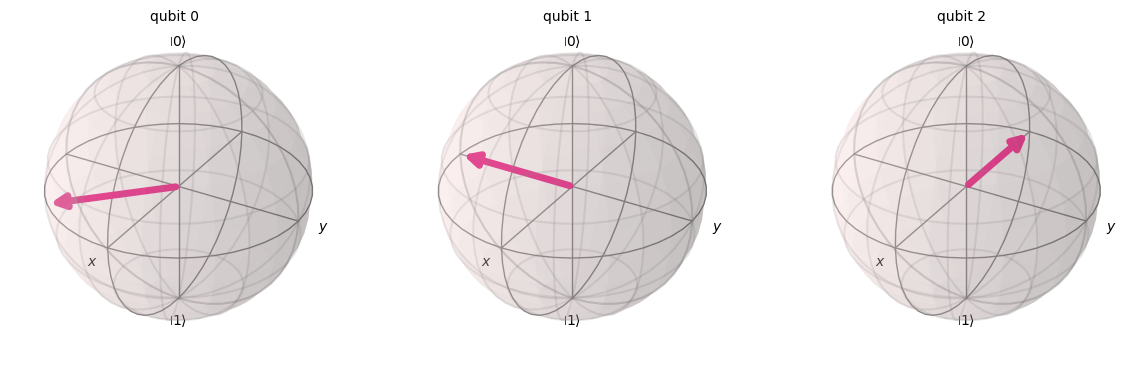

┌─────────┐┌─────────────┐   ┌───┐                                   »
   q_0: ┤ U2(0,π) ├┤ U(0,0,7π/4) ├─X─┤ H ├─■────────────────────────■────────»
        ├─────────┤├─────────────┤ │ └───┘ │P(-π/2) ┌───┐           │        »
   q_1: ┤ U2(0,π) ├┤ U(0,0,7π/2) ├─┼───────■────────┤ H ├─■─────────┼────────»
        ├─────────┤└┬───────────┬┘ │                └───┘ │P(-π/2)  │P(-π/4) »
   q_2: ┤ U2(0,π) ├─┤ U(0,0,7π) ├──X──────────────────────■─────────■────────»
        └─────────┘ └───────────┘                                            »
meas: 3/═════════════════════════════════════════════════════════════════════»
                                                                             »
«              ░ ┌─┐      
«   q_0: ──────░─┤M├──────
«              ░ └╥┘┌─┐   
«   q_1: ──────░──╫─┤M├───
«        ┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ H ├─░──╫──╫─┤M├
«        └───┘ ░  ║  ║ └╥┘
«meas: 3/═════════╩══╩══╩═
«                 0  1  2

In [3]:
# O hardware quântico real realiza medições na base Z, então
# se executarmos QFT nele, teremos apenas uma distribuição aleatória (medidas na base X)
# Para podermos testar, construídos um estado na base de Fourier e então
# invertemos o circuito, verificando que o hardware fornece o resultado
# esperado em termos de probabilidades (amplificando para o estado da base
# computacional correspondente).

def inverse_qft(circuit, n):
    # Cria o circuito para QFT
    qft_c = qft(QuantumCircuit(n), n)
    
    # Inverte o circuito
    invqft_c = qft_c.inverse()
    
    # Adiciona no circuito geral
    circuit.append(invqft_c, circuit.qubits[:n])
    
    # Removendo decompose() teremos apenas uma caixa preta
    return circuit.decompose()

# Número de qubits para realizar a contagem
nqubits = 3

# Número a ser codificado
number = 7

# Cria o circuito
qc = QuantumCircuit(nqubits)

# Cria o estado na base de Fourier correspondente ao estado da base computacional |111>
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

display(qc.draw())

# Executa no simulador e plota na esfera de Bloch (antes)
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
display(plot_bloch_multivector(statevector))

# Inverte o circuito QFT
qc = inverse_qft(qc, nqubits)
qc.measure_all()
display(qc.draw())

In [4]:
# Executa no hardware quântico real
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("backend: ", backend)

# Número de execuções
shots = 2048

# Transpila o circuito para o hardware selecionado
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

# Plota os resultados
counts = job.result().get_counts()
plot_histogram(counts)

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_29903/4052604740.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'